In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.stats import logistic

# Генерация выборки из логистического распределения
l = 3  # параметр местоположения
s = 2  # параметр масштаба
N = 10000  # объем выборки
sample = np.random.logistic(l, s, N)

#ЗАФИКСИРОВАЛИ S, ИЩЕМ ОЦЕНКУ l

Оценка l методом моментов: 2.9988113474376186


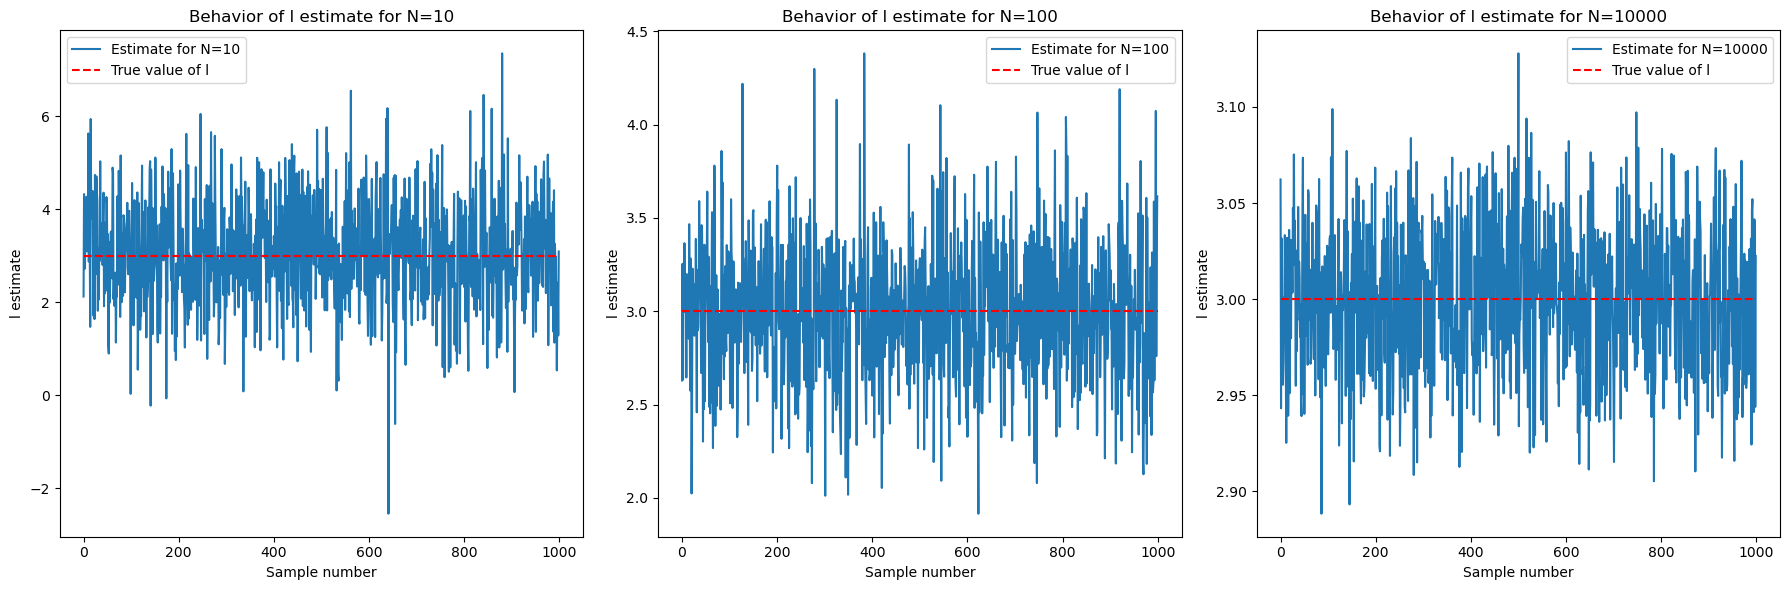

In [3]:
# Метод моментов
l_estimate = np.mean(sample)
print(f"Оценка l методом моментов: {l_estimate}")

# Анализ поведения оценки параметра
def analyze_estimate_behavior(N, num_samples=1000):
    estimates = np.array([np.mean(np.random.logistic(l, s, N)) for _ in range(num_samples)])
    return estimates

N_values = [10, 100, 10000]
estimates_for_different_N = {N: analyze_estimate_behavior(N) for N in N_values}

plt.figure(figsize=(18, 6))
for i, N in enumerate(N_values, 1):
    plt.subplot(1, 3, i)
    plt.plot(estimates_for_different_N[N], label=f'Estimate for N={N}')
    plt.hlines(l, 0, 1000, colors='r', linestyles='dashed', label='True value of l')
    plt.title(f'Behavior of l estimate for N={N}')
    plt.xlabel('Sample number')
    plt.ylabel('l estimate')
    plt.legend()

plt.tight_layout()
plt.show()

Из графиков видно, что с увеличением объема выборки колебания оценок вокруг истинного значения параметра (показано красной пунктирной линией) становятся менее заметными. Для N=10 наблюдается значительный разброс оценок, что указывает на большую неопределенность оценки при малых объемах выборки. При N=100 колебания уменьшаются, а для N=10000 оценки становятся очень стабильными и сосредоточенными вокруг истинного значения параметра.

Эти наблюдения подтверждают тот факт, что точность оценок параметров увеличивается с ростом объема выборки.



---
---
---

![ms.png](attachment:ms.png)

Оценка l методом максимального правдоподобия: 3.002191944371355


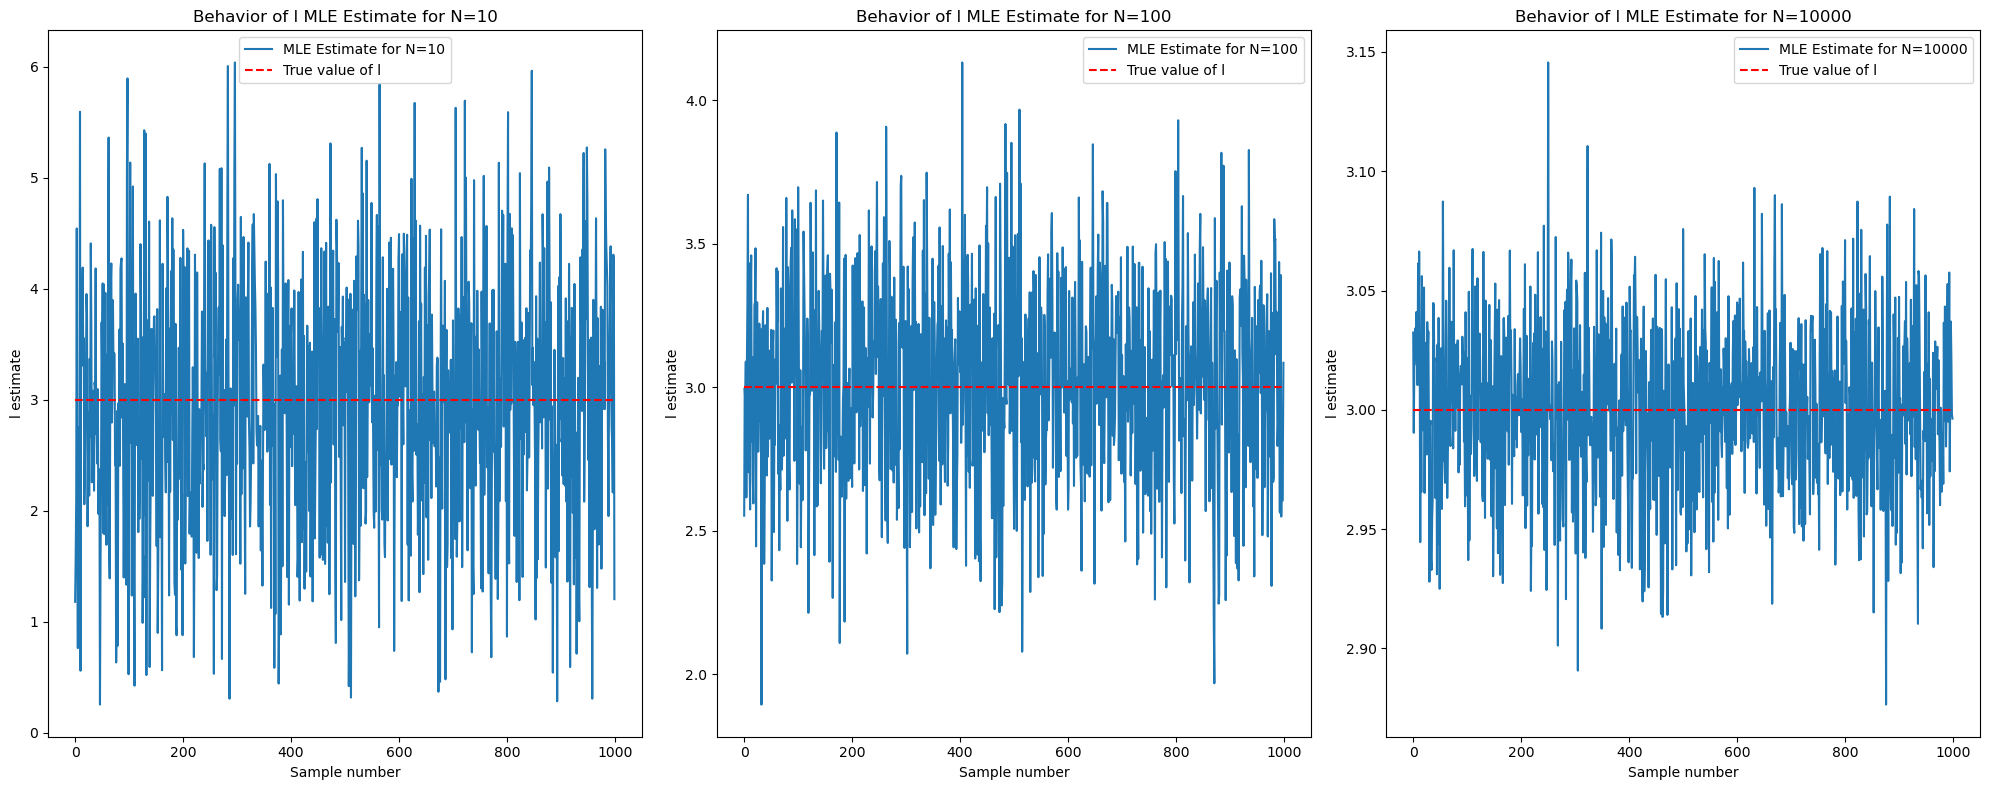

In [4]:
# Метод максимального правдоподобия
def log_likelihood(l, sample, s=2):
    return np.sum(np.log(np.exp(-(sample - l) / s) / (s * (1 + np.exp(-(sample - l) / s))**2)))

def mle_estimate_l(sample, s=2):
    result = minimize_scalar(lambda l: -log_likelihood(l, sample, s))
    return result.x

l_mle_estimate = mle_estimate_l(sample)
print(f"Оценка l методом максимального правдоподобия: {l_mle_estimate}")


# Анализ для N=10, N=100, и N=10000
N_values_mle = [10, 100, 10000]
estimates_mle_for_different_N = {N: np.array([mle_estimate_l(np.random.logistic(l, s, N)) for _ in range(1000)]) for N in N_values_mle}

# Построение графиков 
plt.figure(figsize=(20, 8))  # Увеличим размер, чтобы вместить все три графика
for i, N in enumerate(N_values_mle):
    plt.subplot(1, 3, i + 1)  # Изменим на (1, 3, i+1), чтобы правильно разместить все три графика
    plt.plot(estimates_mle_for_different_N[N], label=f'MLE Estimate for N={N}')
    plt.hlines(l, 0, 1000, colors='r', linestyles='dashed', label='True value of l')
    plt.title(f'Behavior of l MLE Estimate for N={N}')
    plt.xlabel('Sample number')
    plt.ylabel('l estimate')
    plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Оценка дисперсии, смещения и рассеяния оценки параметра
N_analysis = 1000
num_realizations = 100
l_estimates = np.array([mle_estimate_l(np.random.logistic(l, s, N_analysis)) for _ in range(num_realizations)])

variance = np.var(l_estimates)
bias = np.mean(l_estimates) - l
mse = np.mean((l_estimates - l)**2)

print(f"Дисперсия оценок: {variance},\n Смещение оценок: {bias},\n Рассеяние (MSE): {mse}")

Дисперсия оценок: 0.011965150334071993,
 Смещение оценок: 0.0012992823596609249,
 Рассеяние (MSE): 0.011966838468722119


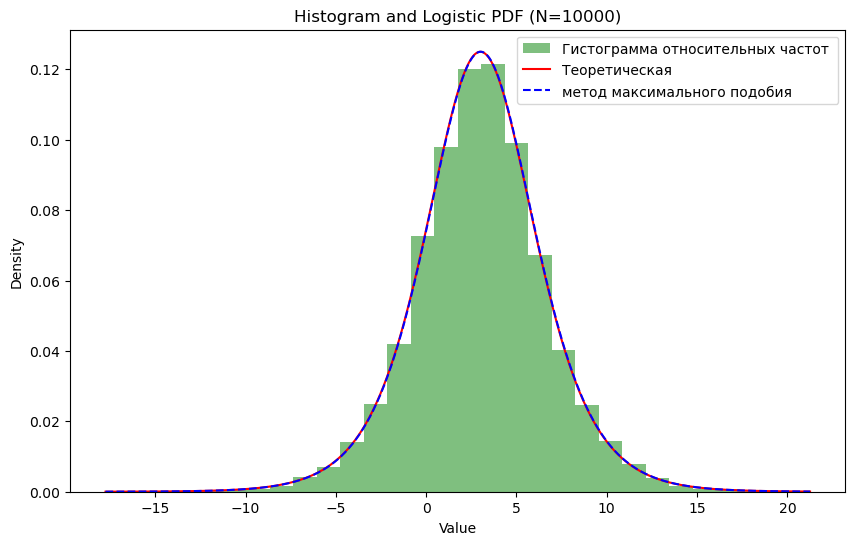

In [6]:
# Расчет гистограммы и эмпирической функции распределения
sample_large = np.random.logistic(l, s, 10000)

#Гистограмма относительных частот
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(sample_large, bins=30, density=True, alpha=0.5, color='g', label='Гистограмма относительных частот ')

#Теоритическая плотность вероятности с истинными параметрами
x = np.linspace(min(sample_large), max(sample_large), 1000)
pdf_true = logistic.pdf(x, l, s)

#Теоретическая плотность вероятности с оцененными параметрами
plt.plot(x, pdf_true, label='Теоретическая', color='r')
l_mle_for_large_sample = mle_estimate_l(sample_large)
pdf_estimated = logistic.pdf(x, l_mle_for_large_sample, s)
plt.plot(x, pdf_estimated, label='метод максимального подобия', color='blue', linestyle='--')


plt.title('Histogram and Logistic PDF (N=10000)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()



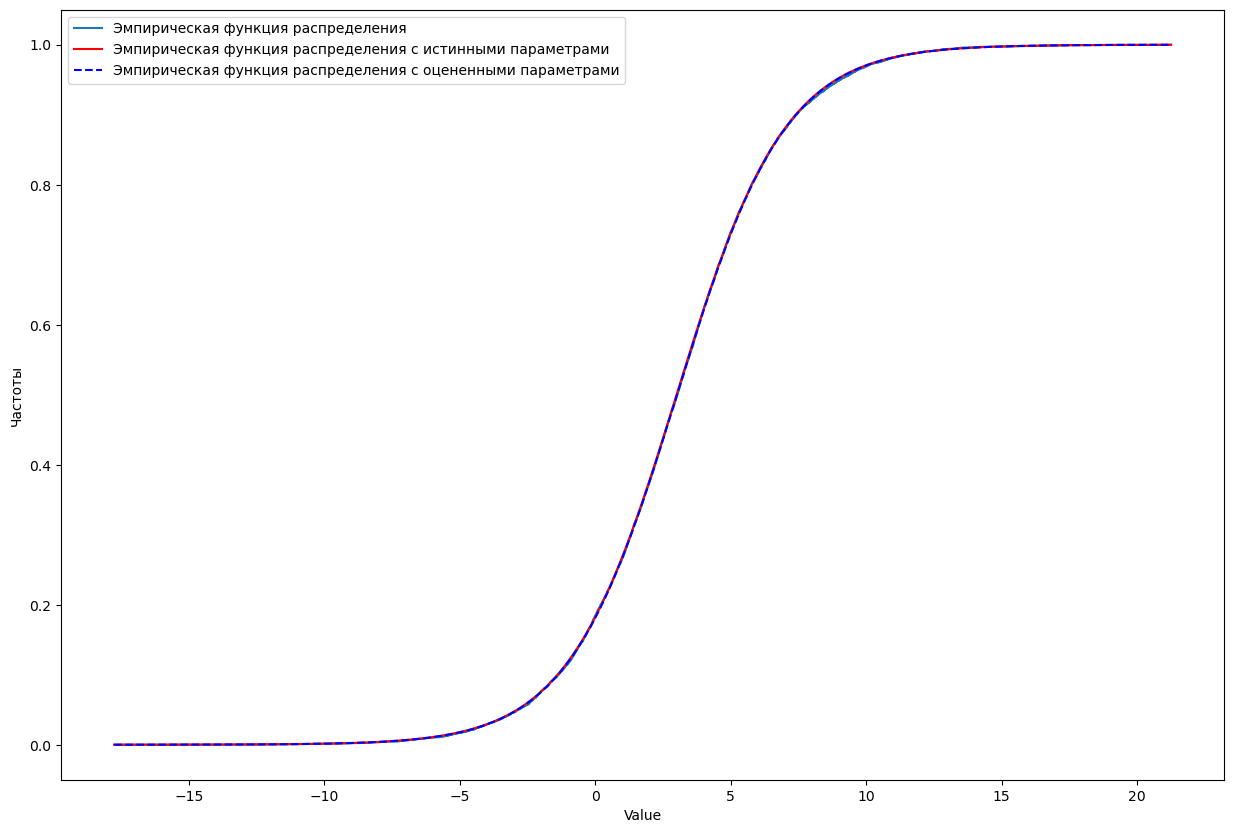

In [8]:
#Расчет эмпирической функции распределения
a = np.sort(sample_large)
n = len(sample_large)
ecdf = np.arange(1, n+1) / n

#Теоретическая функция распределения с истинными параметрами
cdf_true = logistic.cdf(a, l, s)

#Теоретическая функция распределения с оцененными параметрами
cdf_estimated = logistic.cdf(a, l_mle_for_large_sample, s)

#Построение графиков
plt.figure(figsize=(15, 10))
plt.step(a, ecdf, label='Эмпирическая функция распределения', where='post')
plt.plot(a, cdf_true, label='Эмпирическая функция распределения с истинными параметрами', color='r')
plt.plot(a, cdf_estimated, label='Эмпирическая функция распределения с оцененными параметрами', color='blue', linestyle='--')


plt.xlabel('Value')
plt.ylabel('Частоты')
plt.legend()
plt.show()